# Topic Extraction using nouns and adjoints


In [4]:
import spacy
import re
nlp = spacy.load('en')
doc = nlp(u"""Totally satisfied with this purchase. It was great to get the size I needed 
without having to search for it in a store. They came on time. I'm going to order some other colors.""")

noun_adj_pairs = []
for i,token in enumerate(doc):
    if token.pos_ not in ('NOUN','PROPN'):
        continue
    for j in range(i+1,len(doc)):
        if doc[j].pos_ == 'ADJ':
            noun_adj_pairs.append((token,doc[j]))
            break
noun_adj_pairs

[(purchase, great), (size, other), (store, other), (time, other)]

In [5]:
noun_adj_pairs = []
for i,token in enumerate(doc):
    if token.pos_ not in ('ADJ'):
        continue
    for j in range(i+1,len(doc)):
        if doc[j].pos_ == 'NOUN':
            noun_adj_pairs.append((token,doc[j]))
            break
noun_adj_pairs

[(satisfied, purchase), (great, size), (other, colors)]

In [6]:
spacy.displacy.render(doc, style='ent',jupyter=True)

/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [73]:
text ="""cannot say how much love this player from creative it has tons_of features some youll_probably never use like the eax processing 
and gb of storage it also has an easy to navigate menu with two settings one for novices and one for advanced users in_terms of sound 
quality the freq response is fairly nice for this type of player and the signal to noise ratio is above most of the mp have gt db the unit 
is also only the size of normal cd_player has wide_angle"""

doc = nlp(text)
pos_tags = [(i, i.pos_) for i in doc]
pos_tags

[(can, 'VERB'),
 (not, 'ADV'),
 (say, 'VERB'),
 (how, 'ADV'),
 (much, 'ADJ'),
 (love, 'NOUN'),
 (this, 'DET'),
 (player, 'NOUN'),
 (from, 'ADP'),
 (creative, 'ADJ'),
 (it, 'PRON'),
 (has, 'VERB'),
 (tons_of, 'ADV'),
 (features, 'NOUN'),
 (some, 'DET'),
 (youll_probably, 'ADV'),
 (never, 'ADV'),
 (use, 'VERB'),
 (like, 'ADP'),
 (the, 'DET'),
 (eax, 'NOUN'),
 (processing, 'NOUN'),
 (, 'SPACE'),
 (and, 'CCONJ'),
 (gb, 'NOUN'),
 (of, 'ADP'),
 (storage, 'NOUN'),
 (it, 'PRON'),
 (also, 'ADV'),
 (has, 'VERB'),
 (an, 'DET'),
 (easy, 'ADJ'),
 (to, 'PART'),
 (navigate, 'VERB'),
 (menu, 'NOUN'),
 (with, 'ADP'),
 (two, 'NUM'),
 (settings, 'NOUN'),
 (one, 'NUM'),
 (for, 'ADP'),
 (novices, 'NOUN'),
 (and, 'CCONJ'),
 (one, 'NUM'),
 (for, 'ADP'),
 (advanced, 'ADJ'),
 (users, 'NOUN'),
 (in_terms, 'NOUN'),
 (of, 'ADP'),
 (sound, 'ADJ'),
 (, 'SPACE'),
 (quality, 'NOUN'),
 (the, 'DET'),
 (freq, 'NOUN'),
 (response, 'NOUN'),
 (is, 'VERB'),
 (fairly, 'ADV'),
 (nice, 'ADJ'),
 (for, 'ADP'),
 (this, 'DET'),
 (

In [101]:
text ="""wide"""

doc = nlp(text)
pos_tags = [(i, i.pos_) for i in doc]
doc[0].pos_

'ADJ'

In [70]:
'wide_angle'.split('_'),'hello'.split('_')

(['wide', 'angle'], ['hello'])

In [71]:
spacy_tokenizer(text)

'love player creative tons_of feature youll_probably use like eax process gb storage easy navigate menu setting novice advance user in_terms sound quality freq response fairly nice type player signal noise ratio mp gt db unit size normal cd_player wide_angle'

# using single_nouns and sentiment word method

In [5]:
import spacy
import re
nlp = spacy.load('en')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm
import nltk.data
import pandas as pd
import numpy as np
import string

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


f = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/SentiWordNet_3.0.0.txt')
data = f.readlines()
data[0:25]

['# SentiWordNet v3.0.0 (1 June 2010)\n',
 '# Andrea Esuli\n',
 '#\n',
 '# SentiWordNet is distributed under the Attribution-ShareAlike 4.0 Unported (CC BY-SA 4.0) license.\n',
 '# http://creativecommons.org/licenses/by-sa/4.0/\n',
 '#\n',
 '# For any information about SentiWordNet:\n',
 '# Web: http://sentiwordnet.isti.cnr.it\n',
 '# -------\n',
 '#\n',
 '# Data format.\n',
 '#\n',
 '# SentiWordNet v3.0 is based on WordNet version 3.0.\n',
 '# WordNet website: http://wordnet.princeton.edu/\n',
 '#\n',
 '# The pair (POS,ID) uniquely identifies a WordNet (3.0) synset.\n',
 '# The values PosScore and NegScore are the positivity and negativity\n',
 '# score assigned by SentiWordNet to the synset.\n',
 '# The objectivity score can be calculated as:\n',
 '# ObjScore = 1 - (PosScore + NegScore)\n',
 '# SynsetTerms column reports the terms, with sense number, belonging\n',
 '# to the synset (separated by spaces).\n',
 '#\n',
 '# -------\n',
 '#\n']

In [6]:
data = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/SentiWordNet_3.0.0.txt',skiprows=25,delimiter='\t')
data.shape

(117660, 6)

In [7]:
data.head()

,# POS,ID,PosScore,NegScore,SynsetTerms,Gloss
0,a,1740.0,0.125,0.00,able#1,(usually followed by `to') having the necessar...
1,a,2098.0,0.000,0.75,unable#1,(usually followed by `to') not having the nece...
2,a,2312.0,0.000,0.00,dorsal#2 abaxial#1,facing away from the axis of an organ or organ...
3,a,2527.0,0.000,0.00,ventral#2 adaxial#1,nearest to or facing toward the axis of an org...
4,a,2730.0,0.000,0.00,acroscopic#1,facing or on the side toward the apex


In [8]:
data.tail()

,# POS,ID,PosScore,NegScore,SynsetTerms,Gloss
117655,v,2771888.0,0.000,0.125,fog_up#1,"get foggy; ""The windshield fogged up"""
117656,v,2771997.0,0.000,0.000,coal#1 char#1,"burn to charcoal; ""Without a drenching rain, t..."
117657,v,2772202.0,0.125,0.250,haze#1,"become hazy, dull, or cloudy"
117658,v,2772310.0,0.125,0.000,deflagrate#1,cause to burn rapidly and with great intensity...
117659,NaN,NaN,NaN,NaN,#,NaN


In [9]:
data = data.dropna()[(data.PosScore>.5) | (data.NegScore>.5)]
data.shape

/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(4843, 6)

In [10]:
positive = data.loc[data.PosScore>.5,'SynsetTerms']
print(len(positive))
negative = data.loc[data.NegScore>.5,'SynsetTerms']
print(len(negative))

1519
3324


In [11]:
def cleaner(s):
    s = re.sub('\d', '', s)
    s = re.sub('#', '', s)
    return s
positive = positive.apply(cleaner)
negative = negative.apply(cleaner)



In [12]:
positive = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/positive-words.txt')
positive = positive.readlines()
positive = positive[31:]
print(len(positive))

negative = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/negative-words.txt',encoding='utf8',errors='ignore')
negative = negative.readlines()
negative = negative[31:]
def replace_newline(text): return text.replace('\n','')
positive = list(pd.Series(positive).apply(replace_newline))
negative = list(pd.Series(negative).apply(replace_newline))

print(len(negative))

2005
4783


In [13]:
reviews = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/amazon_cloth_shoe_watches_reviews_with_title.csv')
reviews = reviews[['rating','comments','title']]
reviews['comments'] = reviews.comments.astype('str')
reviews['title'] = reviews.title.astype('str')

# reviews = reviews[reviews.title=="Converse Unisex Chuck Taylor Classic Colors Sneaker"]
reviews = reviews[reviews.title=="Levi's Men's 501 Original Fit Jean"]
reviews = reviews.drop_duplicates()
reviews['id'] = range(len(reviews))

# reviews['title']=''
reviews.head()

,rating,comments,title,id
28928,1.0,I have no idea what these are but they are not...,Levi's Men's 501 Original Fit Jean,0
28929,4.0,Brown 501 is hard to find at your local store....,Levi's Men's 501 Original Fit Jean,1
28930,1.0,I bought these jeans and 2 others for my husba...,Levi's Men's 501 Original Fit Jean,2
28931,3.0,Pant size and material were as expected. Pant ...,Levi's Men's 501 Original Fit Jean,3
28932,5.0,"Older reviews (2009 ish) were right, 501s were...",Levi's Men's 501 Original Fit Jean,4


In [14]:
reviews.comments.iloc[0]

'I have no idea what these are but they are not the 501s I grew up with and love.  I hate them and am sending them back.'

In [15]:
pd.Series(reviews.comments.iloc[0].replace('.','').split()).isin(positive)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
dtype: bool

In [16]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords = pd.Series(stopwords)
stopwords = list(stopwords[(~stopwords.isin(positive)) & (~stopwords.isin(negative))])

In [17]:
# Parser for reviews
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

def sentence_finder(reviews,limit1,limit2):
    
    full_comments = []
    full_title = []
    full_id = []
    for i in tqdm(range(limit1,limit2)):
        c = reviews.comments.iloc[i]
        c = tokenizer.tokenize(c)#c.split('.')
        full_comments = full_comments+c
        t1 = reviews.title.iloc[i]
        t = [t1 for j in range(len(c))]
        full_title = full_title+t
        id1 = reviews.id.iloc[i]
        id2 = [id1 for j in range(len(c))]
        full_id = full_id+id2
        
    return full_comments,full_title,full_id


In [18]:
## sentence making
full_comments = []
full_title = []
l1 = int(len(reviews)/2)
c1,t1,id1 = sentence_finder(reviews,0,l1)
c2,t2,id2 = sentence_finder(reviews,l1,len(reviews))
full_comments = c1+c2
full_title = t1+t2
full_id    = id1+id2

reviews_old = reviews[['id','comments']]
reviews_old.columns = ['id','comments_full']

def stripper(s): return s.strip()

reviews = pd.DataFrame()
reviews['comments'] = full_comments
reviews['comments'] = reviews['comments'].apply(stripper)
reviews['title'] = full_title
reviews['id'] = full_id
reviews = reviews[reviews.comments!='']
reviews = reviews.drop_duplicates(subset=['comments'])
reviews = reviews.merge(reviews_old,on='id',how='left')

100%|██████████| 1049/1049 [00:00<00:00, 9415.10it/s]


In [19]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

data = reviews.comments_full[0]
(tokenizer.tokenize(data))

['I have no idea what these are but they are not the 501s I grew up with and love.',
 'I hate them and am sending them back.']

In [20]:
reviews.head()

,comments,title,id,comments_full
0,I have no idea what these are but they are not...,Levi's Men's 501 Original Fit Jean,0,I have no idea what these are but they are not...
1,I hate them and am sending them back.,Levi's Men's 501 Original Fit Jean,0,I have no idea what these are but they are not...
2,Brown 501 is hard to find at your local store.,Levi's Men's 501 Original Fit Jean,1,Brown 501 is hard to find at your local store....
3,"So, I guess That's the reason why it is pricie...",Levi's Men's 501 Original Fit Jean,1,Brown 501 is hard to find at your local store....
4,I bought these jeans and 2 others for my husba...,Levi's Men's 501 Original Fit Jean,2,I bought these jeans and 2 others for my husba...


In [21]:
reviews.comments.iloc[4]

'I bought these jeans and 2 others for my husband, he already had a brand new pair that was a gift from his brother.he loved the way they fit so I decided to but him more.well I got him the same exact size and style, when they came in he triedthem on and they were tighter, so I compared the jeans and seen on the jeans he already had the 501 tag inside the pants was new and the tag inside the amazon pants were faded.'

In [25]:
pos_tags = [(i, i.tag_) for i in doc]
pos_tags

[(size, 'NN'),
 (right, 'RB'),
 (tight, 'JJ'),
 (look, 'NN'),
 (small, 'JJ'),
 (lose, 'JJ'),
 (money, 'NN'),
 (pant, 'NN')]

In [26]:
reviews['cleaned_comments'] = reviews.comments.apply(spacy_tokenizer)
reviews.cleaned_comments.iloc[0]

'idea 501s grow love'

In [89]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reviews.cleaned_comments))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=4, threshold=50) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words1 = [' '.join(bigram_mod[d]) for d in data_words]
data_words1[0:2]

['happy purchase customer_service great email inform recieved order order recieved day late thanks',
 'receive red pair converse chuck_taylors christmas_present year ago wear shoe']

In [91]:
def noun_finder(text):
    doc = nlp(text)
    all_nouns = []
    for i,token in enumerate(doc):
        if token.pos_ in ('NOUN'):
            all_nouns.append(token)
    return all_nouns

all_nouns = []
for i in tqdm(range(len(reviews))):
    all_nouns = all_nouns+noun_finder(reviews.cleaned_comments.iloc[i])

100%|██████████| 6671/6671 [01:10<00:00, 95.15it/s] 


In [92]:
all_nouns[0:5],len(all_nouns)

([idea, love, store, reason, version], 20086)

In [75]:
noun_df = pd.DataFrame(pd.Series(all_nouns).astype('str').value_counts().reset_index())
noun_df.columns = ['noun','count']
noun_df['weight'] = 0
noun_df.head()

,noun,count,weight
0,shoe,938,0
1,size,634,0
2,converse,349,0
3,pair,344,0
4,love,313,0


In [76]:
noun_df.shape

(1665, 3)

In [77]:
text = 'The size is not right it is too tight look to small , i lost my money in this pant'#reviews.comments.iloc[5]
text = spacy_tokenizer(text)
text,reviews.comments.iloc[5]

('size right tight look small lose money pant',
 'I recommend these shoes to anyone.')

In [78]:
doc = nlp(text)

noun_adj_pairs = []
for i,token in enumerate(doc):
    if token.pos_ not in ('NOUN','PROPN'):
        continue
    for j in range(i+1,len(doc)):
        if doc[j].pos_ == 'ADJ':
            noun_adj_pairs.append((token,doc[j]))
            break
noun_adj_pairs

[(size, tight), (look, small)]

In [79]:
reviews.cleaned_comments.iloc[0]

'happy purchase customer service great email inform recieved order order recieved 2 day late .......... thanks'

In [80]:
pd.Series(['good']).isin(positive)

0    True
dtype: bool

In [81]:
(pd.Series([str(token)]).isin(positive)) | (pd.Series([str(token)]).isin(negative))

0    False
dtype: bool

In [82]:
for text in tqdm(reviews.cleaned_comments):
    doc = nlp(text)
    noun_adj_pairs = []
    for i,token in enumerate(doc):
        if token.pos_ not in ('ADJ'):
            continue
        if((pd.Series([str(token)]).isin(positive)[0]) | (pd.Series([str(token)]).isin(negative)[0])):
            for j in range(i+1,min(i+6,len(doc))):
                if doc[j].pos_ in ('NOUN','PROPN'):
                    noun_adj_pairs.append((token,doc[j]))
                    noun_df.loc[noun_df.noun==str(doc[j]),'weight'] = noun_df.loc[noun_df.noun==str(doc[j]),'weight'].iloc[0]+1
                    break
    noun_adj_pairs

100%|██████████| 4041/4041 [01:01<00:00, 66.01it/s]


In [83]:
noun_df = noun_df[~noun_df.noun.isin(spacy_tokenizer(reviews.title.iloc[0]).split())]
noun_df = noun_df.sort_values(by='weight',ascending=False)
noun_df.head(10)

,noun,count,weight
0,shoe,938,193
1,size,634,87
5,color,278,77
3,pair,344,52
16,quality,87,49
17,price,84,43
9,wear,176,42
25,look,59,39
15,purchase,96,36
14,product,99,35


In [123]:
noun_df = noun_df.sort_values(by='weight',ascending=False)
noun_df.head(10)

,noun,count,weight
0,jeans,1242,708
5,quality,414,520
2,size,585,518
1,pair,679,502
4,color,438,460
3,levi,551,302
13,price,231,300
12,product,260,300
8,time,302,258
14,fit,212,256


In [147]:
spacy_tokenizer(reviews.title.iloc[0]).split()

['levi', 'men', '501', 'original', 'fit', 'jean']

In [151]:
reviews.cleaned_comments.iloc[0].find('quality')

-1

In [163]:
def topic_presence(s,item):
    return s.find(item)
    
item = 'price'
reviews['item_presence'] = reviews.apply(lambda row:topic_presence(row['cleaned_comments'],item),axis=1 )

In [164]:
reviews1 = reviews[reviews.item_presence!=-1]
for i in range(0,20):
    print('------------------------------------------------------------------------')
    print(reviews1.comments.iloc[i])

------------------------------------------------------------------------
So, I guess That's the reason why it is pricier than the blue version 501.
------------------------------------------------------------------------
Great Price and great fit for my hubby's favorite brand and style of jeans.
------------------------------------------------------------------------
I have use Levis 501 and 511 since I remember and always bought them in the US, as price in Europe is not competitive, and having always used same size I was very comfortable in buying online without try them on, very surprise that they are smaller than the size indicated, did not expect that to happen and will think twice before buying again
------------------------------------------------------------------------
Watch the price of jeans, they fluctuate a lot.
------------------------------------------------------------------------
Good fit, good looking, and most of all, Great price.
-------------------------------------

In [201]:
a = pd.DataFrame({'sentiment':['positive','negative','neutral'],'count':[0,0,0]})
b = pd.DataFrame({'sentiment':['positive','negative','neutral'],'count':[8,10,5]})
a.merge(b,on=['sentiment','count'],how ='outer').drop_duplicates(subset=['sentiment'],keep='last')

,sentiment,count
3,positive,8
4,negative,10
5,neutral,5


# Complete code of dong topic extraction


In [7]:
import nltk
import pandas as pd
import numpy as np
import re
import spacy
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm
import nltk.data
import string
from datetime import datetime
import sys

sys.path.insert(0,'./../CRM_bokeh_app/scripts')
import sentimental_analysis

init_time = datetime.now()
%matplotlib inline
nlp = spacy.load('en')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

def sentence_finder(reviews,limit1,limit2):
    
    full_comments = []
    full_title = []
    full_id = []
    for i in tqdm(range(limit1,limit2)):
        c = reviews.comments.iloc[i]
        c = tokenizer.tokenize(c)#c.split('.')
        full_comments = full_comments+c
        t1 = reviews.title.iloc[i]
        t = [t1 for j in range(len(c))]
        full_title = full_title+t
        id1 = reviews.id.iloc[i]
        id2 = [id1 for j in range(len(c))]
        full_id = full_id+id2
        
    return full_comments,full_title,full_id

def noun_finder(text):
    doc = nlp(text)
    all_nouns = []
    for i,token in enumerate(doc):
        if token.pos_ in ('NOUN','PROPN'):
            all_nouns.append(token)
    return all_nouns

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Parser for reviews
parser = English()  

## reading the +ve and -ve sentiment words
positive = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/positive-words.txt')
positive = positive.readlines()
positive = positive[31:]
print(len(positive))

negative = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/negative-words.txt',encoding='utf8',errors='ignore')
negative = negative.readlines()
negative = negative[31:]

def replace_newline(text): return text.replace('\n','')

positive = list(pd.Series(positive).apply(replace_newline))
negative = list(pd.Series(negative).apply(replace_newline))

print(len(negative))

## panctuation and stopwords declaration
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords = pd.Series(stopwords)
stopwords = list(stopwords[(~stopwords.isin(positive)) & (~stopwords.isin(negative))])

## Reading the reviews dataset
reviews = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/amazon_cloth_shoe_watches_reviews_with_title.csv')
reviews = reviews[['rating','comments','title']]
reviews['comments'] = reviews.comments.astype('str')
reviews['title'] = reviews.title.astype('str')

# reviews = reviews[reviews.title=="Converse Unisex Chuck Taylor Classic Colors Sneaker"]
title = "Levi's Men's 501 Original Fit Jean"
reviews = reviews[reviews.title==title]
reviews = reviews.drop_duplicates()
reviews['id'] = range(len(reviews))

## sentence making
full_comments = []
full_title = []
l1 = int(len(reviews)/2)
c1,t1,id1 = sentence_finder(reviews,0,l1)
c2,t2,id2 = sentence_finder(reviews,l1,len(reviews))
full_comments = c1+c2
full_title = t1+t2
full_id    = id1+id2

reviews_old = reviews[['id','comments']]
reviews_old.columns = ['id','comments_full']

def stripper(s): return s.strip()

reviews = pd.DataFrame()
reviews['comments'] = full_comments
reviews['comments'] = reviews['comments'].apply(stripper)
reviews['title'] = full_title
reviews['id'] = full_id
reviews = reviews[reviews.comments!='']
reviews = reviews.drop_duplicates(subset=['comments'])
reviews = reviews.merge(reviews_old,on='id',how='left')

title_words = spacy_tokenizer(reviews.title.iloc[0].replace("'","")).split()
def title_word_remover(s):
    for t in title_words:
        s = s.replace(t,'')
    return s

## For finding bigrams
data = reviews.comments.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=4, threshold=50) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words1 = [' '.join(bigram_mod[d]) for d in data_words]
reviews['comments'] = data_words1

## steming lemmetising and stop word removal
reviews['cleaned_comments'] = reviews.comments.apply(spacy_tokenizer)

## sentiment finding
senti = sentimental_analysis.find_sentiment(reviews)
reviews['sentiment_pred'] = senti

## finding all nouns in the full reviews
all_nouns = []
for i in tqdm(range(len(reviews))):
    all_nouns = all_nouns+noun_finder(reviews.cleaned_comments.iloc[i])
    
## Nouns and their count with weight
noun_df = pd.DataFrame(pd.Series(all_nouns).astype('str').value_counts().reset_index())
noun_df.columns = ['noun','count']
noun_df['weight'] = 0
noun_df.head()

# def bigram_weight_update(token):
#     weight = 0
#     bi_words = str(token).split('_')
#     if(len(bi_words)==2):
        

## finding the weight and updating it in df
for text in tqdm(reviews.cleaned_comments):
    doc = nlp(text)
    noun_adj_pairs = []
    
    for i,token in enumerate(doc):
        bi_words = str(token).split('_')
        if ((token.pos_ not in ('ADJ')) & (len(bi_words)==1)):
            continue
        if ((len(bi_words)==2)):
            if((nlp(bi_words[0])[0].pos_=='ADJ')& (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN')) & (~pd.Series(bi_words[1]).isin(title_words)[0]) ):
                noun_adj_pairs.append((bi_words[0],bi_words[1]))
                try:
                    noun_df.loc[noun_df.noun==str(bi_words[1]),'weight'] = noun_df.loc[noun_df.noun==str(bi_words[1]),'weight'].iloc[0]+1
                except:
                    noun_df = noun_df.append(pd.DataFrame({'noun':[bi_words[1]],'count':[1],'weight':[1]},index=[len(noun_df)]))
            elif((token.pos_ in ('NOUN','PROPN')) & (nlp(bi_words[0])[0].pos_ in ('NOUN','PROPN')) & (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN')) & (~pd.Series(bi_words[0]).isin(title_words)[0]) & (~pd.Series(bi_words[1]).isin(title_words)[0]) ):
#             elif((nlp(bi_words[0])[0].pos_ in ('NOUN','PROPN')) & (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN'))):
                noun_df.loc[noun_df.noun==str(token),'weight'] = noun_df.loc[noun_df.noun==str(token),'weight'].iloc[0]+1
            continue
            
        if((pd.Series([str(token)]).isin(positive)[0]) | (pd.Series([str(token)]).isin(negative)[0])):
            for j in range(i+1,min(i+6,len(doc))):
#                 if (doc[j].pos_ in ('NOUN','PROPN')):
                if ((doc[j].pos_ in ('NOUN','PROPN')) & (len(str(doc[j]).split('_'))!=2)):
                    noun_adj_pairs.append((token,doc[j]))
                    noun_df.loc[noun_df.noun==str(doc[j]),'weight'] = noun_df.loc[noun_df.noun==str(doc[j]),'weight'].iloc[0]+1
                    break

## removing words from noun which is in title to find top topics ( topic nouns ) 
noun_df = noun_df[~noun_df.noun.isin(spacy_tokenizer(reviews.title.iloc[0].replace("'","")).split())]
noun_df = noun_df.sort_values(by='weight',ascending=False)

final_time = datetime.now()

## finding the presence of topic
def topic_presence(s,item):
    return s.find(item)
    
# item = 'price'
# reviews['item_presence'] = reviews.apply(lambda row:topic_presence(row['cleaned_comments'],item),axis=1 )

print('-I- Total time = ',str(final_time-init_time))

2005
4783


100%|██████████| 6671/6671 [00:58<00:00, 113.85it/s]

-I- Total time =  0:01:29.959236


In [6]:
from bokeh.models.widgets import RadioButtonGroup
from bokeh.models.widgets import RadioGroup
radio_button_group = RadioButtonGroup(labels=['all','positive','negative','neutral'], active=0)

In [8]:
title

"Levi's Men's 501 Original Fit Jean"

In [9]:
# noun_df = noun_df[noun_df.weight!=0]
noun_df = noun_df.sort_values(by='weight',ascending=False)
noun_df.head(20)

,noun,count,weight
0,jeans,1334,211
4,quality,400,165
6,color,379,111
12,price,205,100
10,product,242,96
3,size,497,95
2,pair,512,95
24,purchase,107,49
16,material,153,48
7,pants,274,35


In [180]:
# noun_df = noun_df[noun_df.weight!=0]
noun_df = noun_df.sort_values(by='count',ascending=False)
noun_df.head(20)

,noun,count,weight
2,item,136,19
3,pocket,115,24
4,trip,105,8
5,zipper,104,14
6,product,99,30
7,use,97,8
8,size,86,25
9,thing,63,16
10,compartment,58,5
11,bathroom,54,5


In [174]:
noun_df[noun_df.noun=='handle']

,noun,count,weight
252,handle,3,0


In [175]:
noun_df[noun_df['count']<noun_df['weight']]

,noun,count,weight
859,bathroom_door,1,14
120,access,6,8
892,sizes,1,7
266,lay,2,3
446,stench,1,2
686,watch,1,2
545,chapsticks,1,2
564,trash,1,2
438,interest,1,2
872,materialtruly,1,2


In [10]:
item = 'pocket'
reviews['item_presence'] = reviews.apply(lambda row:topic_presence(row['cleaned_comments'],item),axis=1 )

reviews1 = reviews[reviews.item_presence!=-1]
for i in range(0,20):
    print('------------------------------------------------------------------------')
    print(reviews1.comments.iloc[i] ," :-> ", reviews1.sentiment_pred.iloc[i])

------------------------------------------------------------------------
hemming is tight pockets look sturdy  :->  negative
------------------------------------------------------------------------
they are very nice comfortable but bought pants and came without the word levis in the red_tag is in the back pocket  :->  positive
------------------------------------------------------------------------
the pockets are positioned on the jean way too low which gives the effect of dragging the pant down to make it appear like he has no butt  :->  negative
------------------------------------------------------------------------
the denim of two pairs has worn thin around the pockets and thighs while the pocket liners have remained in tact  :->  negative
------------------------------------------------------------------------
but would like the front small pocket to be wider  :->  negative
------------------------------------------------------------------------
little crumpled at the front at 

### Summarization

In [11]:
text = """Totally satisfied with this purchase. It was great to get the size I needed 
without having to search for it in a store. They came on time. I'm going to order some other colors."""

In [12]:
from gensim.summarization import summarize

text = '. '.join(reviews[reviews.sentiment_pred=='negative'].comments).replace('\n',' ')
#text = reviews1[reviews.sentiment_pred=='positive'].comments.iloc[0]
print(summarize(text,ratio=.1,split=True,word_count=100))

['have now bought pairs separate orders of through amazon and didnt understand the reviews about poor quality or different quality until received this last pair stick with the stone_washed and you will get what you are expecting the same have been_wearing for years.', 'am really disappointed about todays quality of the black jean since years am wearing these products especial the but since theyare made in pakistan the quality is worse then ever am german citizen living in hungary at the border to austria last time was in germany atchemnitz in levis shop.']


In [13]:
sentence = reviews.comments.iloc[0]
sentence

'have no idea what these are but they are not the grew_up with and love'

In [15]:
from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000')

def sentiment_finder(sentence):
    if len(sentence)>0:
        res = nlp.annotate(sentence,
                           properties={
                               'annotators': 'sentiment',
                               'outputFormat': 'json',
                               'timeout': 1000,
                           })
        for s in res["sentences"]:
            print("%d: '%s': %s %s" % (
                s["index"],
                " ".join([t["word"] for t in s["tokens"]]),
                s["sentimentValue"], s["sentiment"]))

        return res["sentences"][0]["sentiment"].lower()
    else:
        return 'none'

In [16]:
sentence 

'have no idea what these are but they are not the grew_up with and love'

In [42]:
s_full =[]
for sentence in reviews.comments:
    if len(sentence)>0:
        res = nlp.annotate(sentence,
                           properties={
                               'annotators': 'sentiment',
                               'outputFormat': 'json',
                               'timeout': 1000,
                           })
        for s in res["sentences"]:
            print("%d: '%s': %s %s" % (
                s["index"],
                " ".join([t["word"] for t in s["tokens"]]),
                s["sentimentValue"], s["sentiment"]))

        s1 = str(res["sentences"][0]["sentiment"].lower())
    else:
        s1 = 'none'
    s_full.append(s1)

0: 'have no idea what these are but they are not the grew _ up with and love': 2 Neutral
0: 'hate them and am sending them back': 1 Negative
0: 'brown is hard to find at your local store': 1 Negative
0: 'so guess thats the reason why it is pricier than the blue version': 1 Negative
0: 'bought these jeans and others for my husband he already had brand new pair that was gift from his brother he loved the way they fit so decided to but him more well got him the same exact size and style when they came in he triedthem on and they were tighter so compared the jeans and seen on the jeans he already had the tag inside the pants was new and the tag inside the amazon pants were faded': 3 Positive
0: 'so figured they were not new so returned all': 2 Neutral
0: 'pant size and material were as expected': 2 Neutral
0: 'pant color was not what expected': 2 Neutral
0: 'better up close pictures and angles would have been bigger help': 2 Neutral
0: 'shipping speed and condition of product was satifing'

0: 'the only contention with the pair that received is that the quality seems to be far shadow of what is expected of levis jeans': 2 Neutral
0: 'denim is much lighter and thinner than am used to of levis jeans thus the reason for only stars': 1 Negative
0: 'levi sews this leather brand on the back': 2 Neutral
0: 'only now the leather looks like its made out of cardboard': 1 Negative
0: 'terrible quality': 1 Negative
0: 'it rips and is useless': 1 Negative
0: 'if _ youre going to make cheap back with your brand name on it youre saying everything that needs to be said about your company': 1 Negative
0: 'useless': 1 Negative
0: 'last levis every buy': 2 Neutral
0: 'its perfect one just little longer than my length but that have taken care of': 2 Neutral
0: 'its really cool': 3 Positive
0: 'love it': 2 Neutral
0: 'otherwise levis is levis my favorite iexcl iexcl': 1 Negative
0: 'excelente _ producto todo llego con normalidad dentro de los tiempos establecidos el pantalon es lo _ que se es

0: 'the color the size is fine the quality is not good the material is way too thin is not resistant': 1 Negative
0: 'fits perfect in the waist and legs': 3 Positive
0: 'view in the front is nice but view in the rear is bad': 1 Negative
0: 'the pockets are positioned on the jean way too low which gives the effect of dragging the pant down to make it appear like he has no butt': 1 Negative
0: 'his tush is normally his best asset which made these jeans huge disappointment considering the price': 1 Negative
0: 'he does however love the button _ fly on them otherwise would have returned them': 2 Neutral
0: 'good quality': 3 Positive
0: 'is hard to find in stores online irdering was very painless and fit was just right': 1 Negative
0: 'great fit': 3 Positive
0: 'fits better than the more expensive designer jeans': 2 Neutral
0: 'bought pair of gray blue love both': 2 Neutral
0: 'normally wear which are painfully hard to find in the store': 1 Negative
0: 'bought these in and they are spot on 

0: 'the wash on these clean rigid was just as in the picture and like it lot': 2 Neutral
0: 'they fit just as expected as well': 2 Neutral
0: 'given that we get the full selection of washes and sizes amazon also has good price on these': 3 Positive
0: 'would definitely buy my next pair here again': 1 Negative
0: 'the jean its ok but the waist is not the same than in other lev iacute jeans': 1 Negative
0: 'have on this waist and its ok': 2 Neutral
0: 'recomend people to be careful on this item': 2 Neutral
0: 'read all the nasty reviews': 1 Negative
0: 'still went ahead to buy for the sake of curiosity undeniably loved and respected the brand can accept and understand how they made it lighter thinner this time but whats disturbing with the levis got are the craftsmanship how the stitches were major horrible things sadly noticed': 1 Negative
0: 'the stiches along side the pants the entire length of the thigh _ area which is the outer side of the pants the stitches were horribly loose have

0: 'ive been _ wearing levis for years so didnt feel like was taking risk by ordering them online': 1 Negative
0: 'bought inch waist and tried them on couldnt even button them': 2 Neutral
0: 'then tried on an old pair of inch waist jeans and they were tight but could button them': 2 Neutral
0: 'so': 2 Neutral
0: 'took tape measure and measured them theyre less than': 2 Neutral
0: 'ive read this situation has become common problem with levis but it had never happened to me': 2 Neutral
0: 'since most of the stores shop at now carry lees and since can no _ longer trust levis sizing': 2 Neutral
0: 'ive bought my last pair of levis': 2 Neutral
0: 'liked everything about these jeans except the rise': 3 Positive
0: 'the has lower rise and was more appropriate for me': 2 Neutral
0: 'very nice jeans very durable and fit is dead on': 2 Neutral
0: 'purchased these as gift for my daughter and she really likes them': 3 Positive
0: 'the price is as good as it gets anywhere': 3 Positive
0: 'are still

0: 'these levis are not the same as my old ones real crappy jeans ive given up on levis and have just tried lee premium jeans lee premiums are what expected my old levis to be ive happily moved across to lee and have just ordered whole bunch of lee jeans from amazon thanks lee': 1 Negative
0: 'levis mens always no levis mens always no levis mens always no levis mens always no': 1 Negative
0: 'ordered which is what always wear in': 2 Neutral
0: 'pair arrived day later than promised': 2 Neutral
0: 'threw them in the wash for few cycles to soften them up': 1 Negative
0: 'they came out measuring': 2 Neutral
0: 'thanks amazon not': 3 Positive
0: 'for making it real clear that these were gon na shrink': 2 Neutral
0: 'the same size the same quality always': 2 Neutral
0: 'in time where everything seems to be getting either smaller or cheaper or both finally product that you can count on': 2 Neutral
0: 'love my levis': 3 Positive
0: 'it is as expected': 2 Neutral
0: 'they are nice and comfortab

0: 'to find could buy them on amazon but shipping outside of us was not available was really off so many things in the last months are not available for shipping outside the us': 1 Negative
0: 'it sometimes takes long time to find everything and its not until one checks out to discover the item are not available for shipping what can say': 1 Negative
0: 'it is excelent product very good original': 3 Positive
0: 'have about ten pieces of thisone and the size is perfect': 2 Neutral
0: 'levis seems to have messed with the cut of these jeans': 2 Neutral
0: 'still like the look and durability but the fit is off': 1 Negative
0: 'they fit and durability of levis is tops': 3 Positive
0: 'the only concern is button _ fly': 1 Negative
0: 'like zippers but will try this style out': 2 Neutral
0: 'like the darker color': 2 Neutral
0: 'washed these jeans one time as per the label directions and now can no _ longer fit into them': 1 Negative
0: 'they are extremely too small and feel like wasted my mo

0: 'like other reviewers though im now faced with the daunting prospect of finding something that lives up to levis previously excellent legacy': 2 Neutral
0: 'this is what happens when you move quality product from the us to foreign country for manufacture': 2 Neutral
0: 'ive worn levis since before they were even called over years and this product is not levi': 1 Negative
0: 'it is pure garbage and ive ordered my last pair': 1 Negative
0: 'it really is bummer to see what is happening to so many american products that are shipped overseas to cheap labor manufacturers': 1 Negative
0: 'would even advocate boycott of levi until they return to the quality that made them famous now have to search for replacement maybe ill try wranglers': 1 Negative
0: 'should never go to store again can never find my size or color in stock at store': 1 Negative
0: 'did not know the levis had buttons for the fly closure instead of zipper': 1 Negative
0: 'hate buttons for fly closure': 1 Negative
0: 'because

0: 'thes dye in these levis faded out after the first washing to look like tye dye': 2 Neutral
0: 'naturally since they were washed tags were thrown out so unable to return': 1 Negative
0: 'the material is whole lot cheaper too': 2 Neutral
0: 'definitely not like the old school colored levis were used to and we wont be buying these online here again': 2 Neutral
0: 'correct fit color size and it looks great': 3 Positive
0: 'very comfortable and always durable': 3 Positive
0: 'the color stays dark and that is important': 3 Positive
0: 'quality jeans quality clothes': 3 Positive
0: 'excellent jeans': 3 Positive
0: 'great price great fit nice looking jeans fits exactly as expected': 3 Positive
0: 'loose but not baggy very comfortable and the perfect length': 3 Positive
0: 'couldnt believe how quickly received them': 1 Negative
0: 'love amazon prime': 3 Positive
0: 'if you dont want button _ fly dont buy': 2 Neutral
0: 'never mentioned button _ fly in the description': 1 Negative
0: 'materi

0: 'muy _ buen servicio excelente _ producto lo _ recomiendo con los ojos cerrados es la primera vez que compro por internet de verdad que me siento completamente satisfecho contento con la experiencia': 1 Negative
0: 'excelente la _ compra de este articulo lo _ recomiendo para futuras compras llego tal _ cual como _ se esperaba muy responsable': 1 Negative
0: 'excelente _ producto': 2 Neutral
0: 'recomendado': 2 Neutral
0: 'it fits as expected and its quality is excellent': 3 Positive
0: 'it is my favorite pair of jeans': 3 Positive
0: 'it was what spected': 2 Neutral
0: 'levis its nice option xxxx xxxx xxxx xxxx wwwww vvvv bbbbb nnnn mmmmm': 1 Negative
0: 'yes': 2 Neutral
0: 'verifiquen las tallas en una tienda cerca de ustedes asi sabran que modelo talla se ajusta ustedes muy _ buena calidad': 2 Neutral
0: 'despite what have read on other reviews think these jeans are good value': 2 Neutral
0: 'only rated them stars because they feel somewhat lighter than those use to get years _ ag

0: 'very good very suitable for me work is good and cheap': 3 Positive
0: 'really like it very good very suitable for me work is good and cheap': 3 Positive
0: 'really like it': 3 Positive
0: 'lo _ recomiendo envio rapido pude recibir tiempo este _ producto muchas gracia por ser tan responsables amigos muy pronto les voy comprar otro pantalon': 1 Negative
0: 'levis have had particular fit throughout the last years': 2 Neutral
0: 'now they run larger than ever before and the colored ones are larger yet does this satisfy the required word limit': 1 Negative
0: 'ordered for my sons christmas and he love loves them': 3 Positive
0: 'no problems ordering sent to another address arrived so early they had to be hidden': 1 Negative
0: 'good experience': 3 Positive
0: 'have been buying levis at sears for thirty years this is the second pair ive ordered from amazon and the quality wormanship is not the same': 1 Negative
0: 'the stitching has few loose seams and the material is not as tough': 1 Ne

0: 'in my quest for the perfect pair of have discovered that the quality varies widely by the country of origin': 3 Positive
0: 'if had to rank the countries that have seen listed on tags would rank them as turkey dominican republic by country of origin turkey bought this pair of at the levi store in london england on regent street': 1 Negative
0: 'the quality is higher than have observed at any retail _ store in the united _ states': 3 Positive
0: 'the fabric is heavy yet soft and the stitching appears to be high quality': 2 Neutral
0: 'bought without hesitation dominican republic bought this pair of at maxx store in the united _ states': 2 Neutral
0: 'the quality is on par with that of turkey above yet they were sold at maxx due to minor irregularity in the fabric near the bottom of one leg': 1 Negative
0: 'bought without hesitation mexico have seen for sale that were manufactured in mexico': 2 Neutral
0: 'the fabric is significantly thinner lighter and more flexible': 3 Positive
0: 

TypeError: string indices must be integers

In [45]:
res

'CoreNLP request timed out. Your document may be too long.'

## summarization 2

In [17]:
#!pip install bert-extractive-summarizer

In [18]:
from summarizer import Summarizer


ModuleNotFoundError: No module named 'summarizer'

In [7]:
body2 = sentence
model = Summarizer()
result = model(body2)#, min_length=60)
full = ''.join(result)
print(full)

In [9]:
result

''

# full code

In [171]:
import nltk
import pandas as pd
import numpy as np
import re
import spacy
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm
import nltk.data
import string
from datetime import datetime
import sys

sys.path.insert(0,'./../CRM_bokeh_app/scripts')
import sentimental_analysis

init_time = datetime.now()
%matplotlib inline
nlp = spacy.load('en')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

def sentence_finder(reviews,limit1,limit2):
    
    full_comments = []
    full_title = []
    full_id = []
    for i in tqdm(range(limit1,limit2)):
        c = reviews.comments.iloc[i]
        c = tokenizer.tokenize(c)#c.split('.')
        full_comments = full_comments+c
        t1 = reviews.title.iloc[i]
        t = [t1 for j in range(len(c))]
        full_title = full_title+t
        id1 = reviews.id.iloc[i]
        id2 = [id1 for j in range(len(c))]
        full_id = full_id+id2
        
    return full_comments,full_title,full_id

def noun_finder(text):
    doc = nlp(text)
    all_nouns = []
    for i,token in enumerate(doc):
        if token.pos_ in ('NOUN','PROPN'):
            all_nouns.append(token)
    return all_nouns

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Parser for reviews
parser = English()  

## reading the +ve and -ve sentiment words
positive = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/positive-words.txt')
positive = positive.readlines()
positive = positive[31:]
print(len(positive))

negative = open('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/negative-words.txt',encoding='utf8',errors='ignore')
negative = negative.readlines()
negative = negative[31:]

def replace_newline(text): return text.replace('\n','')

positive = list(pd.Series(positive).apply(replace_newline))
negative = list(pd.Series(negative).apply(replace_newline))

print(len(negative))

## panctuation and stopwords declaration
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords = pd.Series(stopwords)
stopwords = list(stopwords[(~stopwords.isin(positive)) & (~stopwords.isin(negative))])

## Reading the reviews dataset
reviews = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/amazon_cloth_shoe_watches_reviews_with_title.csv')
reviews = reviews[['rating','comments','title']]
reviews['comments'] = reviews.comments.astype('str')
reviews['title'] = reviews.title.astype('str')

def 

# reviews = reviews[reviews.title=="Converse Unisex Chuck Taylor Classic Colors Sneaker"]
title = "Household Essentials Hanging Cosmetic and Grooming Travel Bag, Black"
reviews = reviews[reviews.title==title]
reviews = reviews.drop_duplicates()
reviews['id'] = range(len(reviews))

## sentence making
full_comments = []
full_title = []
l1 = int(len(reviews)/2)
c1,t1,id1 = sentence_finder(reviews,0,l1)
c2,t2,id2 = sentence_finder(reviews,l1,len(reviews))
full_comments = c1+c2
full_title = t1+t2
full_id    = id1+id2

reviews_old = reviews[['id','comments']]
reviews_old.columns = ['id','comments_full']

def stripper(s): return s.strip()

reviews = pd.DataFrame()
reviews['comments'] = full_comments
reviews['comments'] = reviews['comments'].apply(stripper)
reviews['title'] = full_title
reviews['id'] = full_id
reviews = reviews[reviews.comments!='']
reviews = reviews.drop_duplicates(subset=['comments'])
reviews = reviews.merge(reviews_old,on='id',how='left')

title_words = spacy_tokenizer(reviews.title.iloc[0].replace("'","")).split()
def title_word_remover(s):
    for t in title_words:
        s = s.replace(t,'')
    return s

## For finding bigrams
data = reviews.comments.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=4, threshold=50) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words1 = [' '.join(bigram_mod[d]) for d in data_words]
reviews['comments'] = data_words1

## steming lemmetising and stop word removal
reviews['cleaned_comments'] = reviews.comments.apply(spacy_tokenizer)

## sentiment finding
senti = sentimental_analysis.find_sentiment(reviews)
reviews['sentiment_pred'] = senti

## finding all nouns in the full reviews
all_nouns = []
for i in tqdm(range(len(reviews))):
    all_nouns = all_nouns+noun_finder(reviews.cleaned_comments.iloc[i])
    
## Nouns and their count with weight
noun_df = pd.DataFrame(pd.Series(all_nouns).astype('str').value_counts().reset_index())
noun_df.columns = ['noun','count']
noun_df['weight'] = 0
noun_df.head()

# def bigram_weight_update(token):
#     weight = 0
#     bi_words = str(token).split('_')
#     if(len(bi_words)==2):
        

## finding the weight and updating it in df
for text in tqdm(reviews.cleaned_comments):
    doc = nlp(text)
    noun_adj_pairs = []
    
    for i,token in enumerate(doc):
        bi_words = str(token).split('_')
        if ((token.pos_ not in ('ADJ')) & (len(bi_words)==1)):
            continue
        if ((len(bi_words)==2)):
            if((nlp(bi_words[0])[0].pos_=='ADJ')& (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN')) & (~pd.Series(bi_words[1]).isin(title_words)[0]) ):
                noun_adj_pairs.append((bi_words[0],bi_words[1]))
                try:
                    noun_df.loc[noun_df.noun==str(bi_words[1]),'weight'] = noun_df.loc[noun_df.noun==str(bi_words[1]),'weight'].iloc[0]+1
                except:
                    noun_df = noun_df.append(pd.DataFrame({'noun':[bi_words[1]],'count':[1],'weight':[1]},index=[len(noun_df)]))
            elif((nlp(bi_words[0])[0].pos_ in ('NOUN','PROPN')) & (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN')) & (~pd.Series(bi_words[0]).isin(title_words)[0]) & (~pd.Series(bi_words[1]).isin(title_words)[0]) ):
#             elif((nlp(bi_words[0])[0].pos_ in ('NOUN','PROPN')) & (nlp(bi_words[1])[0].pos_ in ('NOUN','PROPN'))):
                noun_df.loc[noun_df.noun==str(token),'weight'] = noun_df.loc[noun_df.noun==str(token),'weight'].iloc[0]+1
            continue
            
        if((pd.Series([str(token)]).isin(positive)[0]) | (pd.Series([str(token)]).isin(negative)[0])):
            for j in range(i+1,min(i+6,len(doc))):
#                 if (doc[j].pos_ in ('NOUN','PROPN')):
                if ((doc[j].pos_ in ('NOUN','PROPN')) & (len(str(doc[j]).split('_'))!=2)):
                    noun_adj_pairs.append((token,doc[j]))
                    noun_df.loc[noun_df.noun==str(doc[j]),'weight'] = noun_df.loc[noun_df.noun==str(doc[j]),'weight'].iloc[0]+1
                    break

## removing words from noun which is in title to find top topics ( topic nouns ) 
noun_df = noun_df[~noun_df.noun.isin(spacy_tokenizer(reviews.title.iloc[0].replace("'","")).split())]
noun_df = noun_df.sort_values(by='weight',ascending=False)

final_time = datetime.now()

## finding the presence of topic
def topic_presence(s,item):
    return s.find(item)
    
# item = 'price'
# reviews['item_presence'] = reviews.apply(lambda row:topic_presence(row['cleaned_comments'],item),axis=1 )

print('-I- Total time = ',str(final_time-init_time))

2005
4783


100%|██████████| 1403/1403 [00:23<00:00, 58.93it/s]

-I- Total time =  0:00:41.262293


In [57]:
reviews.sentiment_pred.value_counts().transpose()

positive    3620
neutral     1973
negative    1078
Name: sentiment_pred, dtype: int64

# Other

In [27]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/gpu1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
reviews = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/amazon_cloth_shoe_watches_reviews_with_title.csv')
reviews = reviews[['rating','comments','title']]
reviews['comments'] = reviews.comments.astype('str')
reviews['title'] = reviews.title.astype('str')

# reviews = reviews[reviews.title=="Converse Unisex Chuck Taylor Classic Colors Sneaker"]
reviews = reviews[reviews.title=="Levi's Men's 501 Original Fit Jean"]
reviews = reviews.drop_duplicates()
reviews['id'] = range(len(reviews))

# reviews['title']=''
reviews.head()

,rating,comments,title,id
28928,1.0,I have no idea what these are but they are not the 501s I grew up with and love. I hate them and am sending them back.,Levi's Men's 501 Original Fit Jean,0
28929,4.0,"Brown 501 is hard to find at your local store. So, I guess That's the reason why it is pricier than the blue version 501.",Levi's Men's 501 Original Fit Jean,1
28930,1.0,"I bought these jeans and 2 others for my husband, he already had a brand new pair that was a gift from his brother.he loved the way they fit so I decided to but him more.well I got him the same ex...",Levi's Men's 501 Original Fit Jean,2
28931,3.0,Pant size and material were as expected. Pant color was not what I expected! Better up close pictures and angles would have been a bigger help. Shipping speed and condition of product was satifing.,Levi's Men's 501 Original Fit Jean,3
28932,5.0,"Older reviews (2009 ish) were right, 501s were bad. Thin and destructible. I avoided Levi like the plague for the last 4 or 5 years.But I just got a new job where I can wear jeans to work again, ...",Levi's Men's 501 Original Fit Jean,4


In [6]:
reviews.shape

(2105, 3)

In [7]:
# reviews = pd.read_excel('../data/Bag_Reviews.xlsx')
# reviews = reviews[['comments','rating']]
# reviews = reviews.drop_duplicates()
# reviews.shape

In [8]:
reviews.comments.iloc[1]

"Brown 501 is hard to find at your local store. So, I guess That's the reason why it is pricier than the blue version 501."

In [9]:
# function to plot most frequent terms
def freq_words(x, terms = 30):

    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

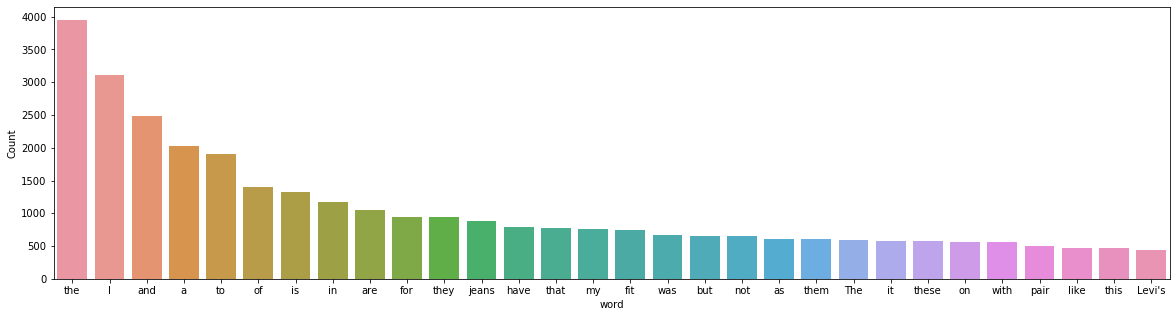

In [10]:
freq_words(reviews['comments'])

In [11]:
# remove unwanted characters, numbers and symbols
reviews['comments'] = reviews['comments'].str.replace("[^a-zA-Z#]", " ")
from nltk.corpus import stopwords
import string
stop_words = stopwords.words('english')
from spacy.lang.en.stop_words import STOP_WORDS

punctuations = string.punctuation
stopwords = list(STOP_WORDS)

In [12]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
reviews['comments'] = reviews['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews1 = [remove_stopwords(r.split()) for r in reviews['comments']]

# make entire text lowercase
reviews1 = [r.lower() for r in reviews1]

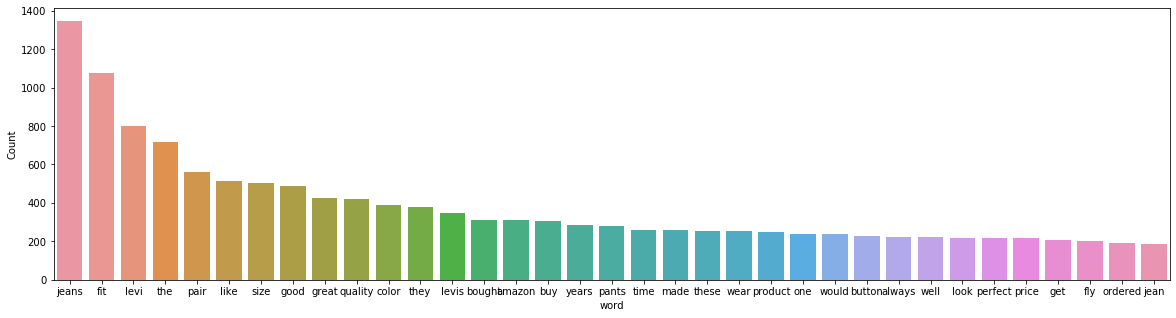

In [13]:
freq_words(reviews1, 35)

In [14]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)


In [15]:
tokenized_reviews = pd.Series(reviews1).apply(lambda x: x.split())
print(tokenized_reviews[0])


['idea', 'grew', 'love', 'hate', 'sending', 'back']


In [16]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[0]) # print lemmatized review

['idea', 'love', 'hate']


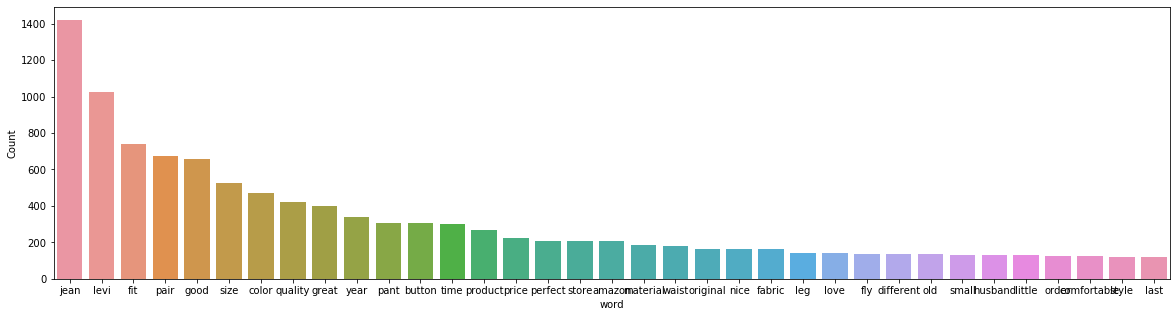

In [17]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

reviews['reviews'] = reviews_3

freq_words(reviews['reviews'], 35)

In [18]:
reviews_2[0]

['idea', 'love', 'hate']

## LDA model starts

In [19]:
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [20]:
# lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,gamma_threshold=0.01,\
#                       minimum_probability=0.001,minimum_phi_value=0.01,chunksize=1000, passes=50,iterations=50,decay=.5,)\
#                       #eta=[0.01]*len(dictionary.keys()))

In [21]:
doc_term_matrix = doc_term_matrix
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
%time lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,gamma_threshold=0.01,\
                      minimum_probability=0.001,minimum_phi_value=0.001,chunksize=1000, passes=50,iterations=50,decay=.5,)\
                      #eta=[.0001]*len(dictionary.keys()))

CPU times: user 13.9 s, sys: 0 ns, total: 13.9 s
Wall time: 13.9 s


In [22]:
lda_model.print_topics()

[(0,
  '0.050*"levi" + 0.050*"jean" + 0.038*"good" + 0.035*"quality" + 0.026*"product" + 0.022*"year" + 0.018*"button" + 0.016*"amazon" + 0.015*"pair" + 0.013*"material"'),
 (1,
  '0.044*"jean" + 0.036*"pair" + 0.028*"levi" + 0.016*"year" + 0.015*"old" + 0.014*"fit" + 0.013*"waist" + 0.012*"big" + 0.010*"button" + 0.009*"blue"'),
 (2,
  '0.018*"producto" + 0.016*"calidad" + 0.015*"muy" + 0.014*"con" + 0.012*"son" + 0.011*"gusto" + 0.011*"buena" + 0.010*"este" + 0.009*"los" + 0.009*"todo"'),
 (3,
  '0.060*"fit" + 0.051*"jean" + 0.043*"size" + 0.035*"color" + 0.027*"good" + 0.024*"great" + 0.023*"perfect" + 0.021*"time" + 0.020*"levi" + 0.018*"pair"')]

In [24]:
def preprocess(text):
    text1 = remove_stopwords([text])

    # make entire text lowercase
    text1 = text1.lower()

    tokenized_text = text1.split()
    text2 = lemmatization([tokenized_text])
    return text2[0]

In [25]:
text = reviews.comments.iloc[0]
text2 = preprocess(text)

lda_model[dictionary.doc2bow(text2)]

[(0, 0.73923737), (1, 0.08729599), (2, 0.08340885), (3, 0.090057775)]

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.074153  0.083124       1        1  33.488461
3     -0.124296 -0.177334       2        1  30.240816
0     -0.115912  0.105733       3        1  28.661144
2      0.314361 -0.011522       4        1   7.609577, topic_info=     Category        Freq       Term        Total  loglift  logprob
14    Default  652.000000        fit   652.000000  30.0000  30.0000
86    Default  318.000000    quality   318.000000  29.0000  29.0000
32    Default  210.000000    product   210.000000  28.0000  28.0000
42    Default  569.000000       good   569.000000  27.0000  27.0000
48    Default  196.000000    perfect   196.000000  26.0000  26.0000
28    Default  403.000000      color   403.000000  25.0000  25.0000
21    Default  505.000000       size   505.000000  24.0000  24.0000
75    Default  313.000000      great   313.000000  23.0000  23.0000
62    Default  328.000000       year   328.000000  22.0000  22.0000
47    Default  150.000000        old   150.000000  21.0000  21.0000
37    Default  243.000000     button   243.000000  20.0000  20.0000
341   Default  111.000000        big   111.000000  19.0000  19.0000
11    Default  205.000000     amazon   205.000000  18.0000  18.0000
243   Default   39.000000   producto    39.000000  17.0000  17.0000
77    Default  194.000000      price   194.000000  16.0000  16.0000
406   Default   76.000000        son    76.000000  15.0000  15.0000
73    Default  118.000000      brand   118.000000  14.0000  14.0000
30    Default  184.000000   material   184.000000  13.0000  13.0000
528   Default   34.000000    calidad    34.000000  12.0000  12.0000
147   Default  130.000000       nice   130.000000  11.0000  11.0000
378   Default  179.000000      waist   179.000000  10.0000  10.0000
265   Default   33.000000        muy    33.000000   9.0000   9.0000
118   Default   74.000000     shrink    74.000000   8.0000   8.0000
46    Default  865.000000       levi   865.000000   7.0000   7.0000
19    Default  622.000000       pair   622.000000   6.0000   6.0000
236   Default   30.000000        con    30.000000   5.0000   5.0000
122   Default   72.000000        lot    72.000000   4.0000   4.0000
58    Default  104.000000       thin   104.000000   3.0000   3.0000
112   Default   93.000000    husband    93.000000   2.0000   2.0000
120   Default  305.000000       time   305.000000   1.0000   1.0000
...       ...         ...        ...          ...      ...      ...
1406   Topic4   24.651609      gusto    25.347534   2.5479  -4.4786
1053   Topic4   23.754763      buena    24.450743   2.5469  -4.5157
570    Topic4   21.822117       este    22.518127   2.5444  -4.6006
240    Topic4   20.482550        los    21.178593   2.5423  -4.6639
96     Topic4   19.516336       todo    20.212271   2.5407  -4.7122
3323   Topic4   18.510571       solo    19.212599   2.5385  -4.7651
239    Topic4   17.691696      llego    18.387690   2.5372  -4.8104
1524   Topic4   15.204575       tela    15.900501   2.5310  -4.9619
583    Topic4   14.792661       como    15.488791   2.5298  -4.9893
2309   Topic4   14.311490      marca    15.007481   2.5283  -5.0224
1020   Topic4   14.164769       poco    14.860930   2.5278  -5.0327
244    Topic4   13.826322        que    14.522480   2.5266  -5.0569
720    Topic4   13.753209     tiempo    14.449156   2.5264  -5.0622
1914   Topic4   13.645161       esta    14.341090   2.5260  -5.0701
628    Topic4   13.160076       buen    13.856072   2.5242  -5.1063
320    Topic4   12.940058        una    13.636227   2.5234  -5.1231
1465   Topic4   12.640348     oacute    13.336269   2.5222  -5.1466
91     Topic4   12.493710       para    13.189698   2.5216  -5.1582
1405   Topic4   12.267069        fue    12.963044   2.5206  -5.1766
3405   Topic4   11.712501       creo    12.408431   2.5180  -5.2228
3416   Topic4   11.712502     gruesa    12.408433   2.5180  -5.2228
1913   Topic4   11.223088  ve

## ldamallet

In [27]:
import gensim
mallet_path = '/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=4, 
                                             id2word=dictionary,iterations=50,random_seed=47)

In [29]:
ldamallet.print_topics()

[(0,
  '0.087*"jean" + 0.056*"levi" + 0.035*"pair" + 0.030*"fit" + 0.019*"brand" + 0.017*"small" + 0.014*"great" + 0.013*"quality" + 0.013*"black" + 0.013*"year"'),
 (1,
  '0.039*"levi" + 0.037*"pair" + 0.032*"size" + 0.031*"good" + 0.030*"quality" + 0.024*"original" + 0.023*"year" + 0.023*"color" + 0.019*"jean" + 0.018*"wash"'),
 (2,
  '0.063*"good" + 0.062*"jean" + 0.058*"fit" + 0.044*"size" + 0.036*"product" + 0.025*"time" + 0.025*"color" + 0.024*"levi" + 0.022*"material" + 0.021*"great"'),
 (3,
  '0.051*"jean" + 0.039*"levi" + 0.036*"button" + 0.031*"perfect" + 0.028*"pair" + 0.026*"great" + 0.023*"amazon" + 0.022*"pant" + 0.020*"fit" + 0.020*"price"')]

In [30]:
text = reviews.comments.iloc[0]
text2 = preprocess(text)

lda_model[dictionary.doc2bow(text2)]

[(0, 0.7397374), (1, 0.087477796), (2, 0.08340868), (3, 0.089376144)]

In [31]:
reviews.comments.iloc[0]

'have idea what these are but they are not the grew with and love hate them and sending them back'

In [32]:
dominent_topic_list = []
topic_detail = pd.DataFrame()
topic_detail['index1'] = reviews.index
for i in range(0,4):
    topic_detail['topic_'+str(i)+'_perc'] = 0.0

text = reviews.comments.iloc[i]
text = preprocess(text)
x = lda_model[dictionary.doc2bow(text2)]
y = pd.Series([x1[1] for x1 in x])
for k in range(len(y)):
    topic_detail.loc[topic_detail.index1==0,'topic_'+str(k)+'_perc'] = y[k]
y1 = y[y==max(y)].index[0]

In [33]:
x

[(0, 0.7392343), (1, 0.087427974), (2, 0.08340887), (3, 0.08992885)]

In [34]:
y1

0

## LDA sklearn

In [35]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

reviews_3 = [' '.join(s) for s in reviews_2]
vectorizer = CountVectorizer(min_df=1, max_df=1.0, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(reviews_3)

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=4, max_iter=10, learning_method='online',verbose=True,mean_change_tol=.01,
                               random_state=46,learning_decay=0.5)
# lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100, learning_method='batch',verbose=False)
data_lda = lda.fit_transform(data_vectorized)

<>:5: DeprecationWarning: invalid escape sequence \-
<>:5: DeprecationWarning: invalid escape sequence \-
<>:5: DeprecationWarning: invalid escape sequence \-
<ipython-input-35-9574053b9506>:5: DeprecationWarning: invalid escape sequence \-
  vectorizer = CountVectorizer(min_df=1, max_df=1.0, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [36]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        topic_keys = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 0:-1]]
        topics.append((idx,topic_keys))
        print([(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 0:-1]]) 
    return topics

print("LDA Model:")
topics_lda = selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('good', 442.9845717321806), ('jean', 315.50484942821555), ('great', 262.73462687539075), ('price', 231.67146421129243), ('product', 220.74038302810743), ('quality', 206.90537815764333), ('fit', 206.53004354297607), ('color', 179.2578112852347), ('levi', 179.03377696745432)]
Topic 1:
[('pant', 238.73395539735813), ('small', 134.39733883062374), ('size', 78.43609850379245), ('tag', 34.28863008200822), ('available', 33.51577956503593), ('model', 33.25592960376372), ('shipping', 32.95720273176976), ('product', 30.500710333999134), ('-pron-', 25.35299518433186)]
Topic 2:
[('muy', 51.43909052849092), ('producto', 45.10134171343162), ('calidad', 40.03450947808534), ('sale', 29.948450617001257), ('buena', 27.432383175437614), ('llego', 25.606632286444558), ('son', 25.518041749833788), ('shrunk', 24.506137789620876), ('este', 24.225234413448753)]
Topic 3:
[('jean', 1107.5581406872823), ('levi', 842.4038334097611), ('pair', 684.1460973308683), ('fit', 515.214844619541), ('y

In [37]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

/home/gpu1/anaconda3/envs/fastaipy372/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -258.098785 -183.925827       1        1  59.130148
0      -57.585415   75.356194       2        1  22.045347
1      -28.197184 -154.544495       3        1  10.496433
2     -287.487030   45.974907       4        1   8.328073, topic_info=     Category         Freq         Term        Total  loglift  logprob
1244  Default   572.000000         good   572.000000  30.0000  30.0000
2029  Default   261.000000         pant   261.000000  29.0000  29.0000
2022  Default   626.000000         pair   626.000000  28.0000  28.0000
1271  Default   348.000000        great   348.000000  27.0000  27.0000
2212  Default   203.000000        price   203.000000  26.0000  26.0000
2731  Default   112.000000        small   112.000000  25.0000  25.0000
2234  Default   224.000000      product   224.000000  24.0000  24.0000
1526  Default  1296.000000         jean  1296.000000  23.0000  23.0000
2293  Default   361.000000      quality   361.000000  22.0000  22.0000
1118  Default   651.000000          fit   651.000000  21.0000  21.0000
2710  Default   483.000000         size   483.000000  20.0000  20.0000
2084  Default   182.000000      perfect   182.000000  19.0000  19.0000
3382  Default   318.000000         year   318.000000  18.0000  18.0000
1615  Default   930.000000         levi   930.000000  17.0000  17.0000
483   Default   423.000000        color   423.000000  16.0000  16.0000
328   Default   261.000000       button   261.000000  15.0000  15.0000
1852  Default    43.000000          muy    43.000000  14.0000  14.0000
1679  Default   113.000000         love   113.000000  13.0000  13.0000
2238  Default    38.000000     producto    38.000000  12.0000  12.0000
2761  Default    69.000000          son    69.000000  11.0000  11.0000
2282  Default    87.000000     purchase    87.000000  10.0000  10.0000
344   Default    33.000000      calidad    33.000000   9.0000   9.0000
1003  Default    56.000000    excellent    56.000000   8.0000   8.0000
1885  Default   137.000000         nice   137.000000   7.0000   7.0000
2988  Default    52.000000        thank    52.000000   6.0000   6.0000
2929  Default    37.000000          tag    37.000000   5.0000   5.0000
1313  Default    95.000000        happy    95.000000   4.0000   4.0000
498   Default   109.000000  comfortable   109.000000   3.0000   3.0000
1041  Default   146.000000       fabric   146.000000   2.0000   2.0000
167   Default    28.000000    available    28.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
308    Topic4    22.848736        buena    23.503496   2.4573  -4.5872
2539   Topic4    24.944397         sale    25.688846   2.4561  -4.4994
1651   Topic4    21.328048        llego    21.982749   2.4553  -4.6560
983    Topic4    20.177466         este    20.832342   2.4536  -4.7115
1673   Topic4    17.623026          los    18.278011   2.4490  -4.8468
3053   Topic4    17.356933         todo    18.011583   2.4485  -4.8621
3031   Topic4    15.321998       tiempo    15.976644   2.4437  -4.9868
508    Topic4    14.556902         como    15.211786   2.4415  -5.0380
2040   Topic4    13.541623         para    14.196408   2.4383  -5.1103
1180   Topic4    13.352975          fue    14.007714   2.4377  -5.1243
3139   Topic4    13.368033          una    14.023528   2.4377  -5.1232
2298   Topic4    13.156198          que    13.811678   2.4369  -5.1392
307    Topic4    12.176534         buen    12.831372   2.4332  -5.2165
461    Topic4    13.913754       clothe    14.662675   2.4331  -5.0832
309    Topic4    12.113668        bueno    12.768577   2.4329  -5.2217
2170   Topic4    11.991875          por    12.646636   2.4324  -5.2318
3241   Topic4    11.948123    venezuela    12.607491   2.4318  -5.2355
1256   Topic4    11.645774       gracia    12.300573   2.4308  -5.2611
1725   Topic4    12.688691       market    13.444853   2.42

# Extract from email

In [1]:
import email, getpass, imaplib, os, re
import matplotlib.pyplot as plt
import html2text
import pandas as pd

In [2]:
# user = 'crmpredmac@gmail.com'
# pwd = getpass.getpass("Enter your password --> ")


# m = imaplib.IMAP4_SSL("imap.gmail.com")
# m.login(user, pwd)

# #resp, items = m.search(None, '(FROM "Google")')
# resp, items = m.search(None,'ALL')
# items = items[0].split()  

# my_msg = [] # store relevant msgs here in please
# msg_cnt = 0
# break_ = False

In [3]:
# #for emailid in items[::-1]:
# for emailid in items[::-4]:
#     resp, data = m.fetch(emailid, "(RFC822)")
#     if ( break_ ):
#         break
#     for response_part in data[0:1]:
#         if isinstance(response_part, tuple):
#             msg = email.message_from_string((str(response_part[1])))
#             span = l.search(str(response_part[1])).span()[0]
#             #span2 = l2.search(str(response_part[1])).span()[0]
#             txt = str(response_part[1])[span:-2]
#             varSubject = msg['subject']
#             varDate = msg['date']

In [4]:
re_from = re.compile(u'From:')
re_date = re.compile(u'Date:')
re_subject = re.compile(u'Subject:')
re_slash = re.compile('\\r')


In [21]:
# Importing libraries
import imaplib, email
from tqdm import tqdm
import email_cred
  
user = email_cred.username
password = email_cred.password
imap_url = email_cred.imap_url
  
# Function to get email content part i.e its body part 
def get_body(msg): 
    if msg.is_multipart(): 
        return get_body(msg.get_payload(0)) 
    else: 
        return msg.get_payload(None, True) 


# Function to search for a key value pair  
def search(key, value, con):  
    result, data = con.search(None, key, '"{}"'.format(value))
    #result, data = con.search(None, key)
    return data 
  
# Function to get the list of emails under this label
def get_emails(result_bytes): 
    msgs = [] # all the email data are pushed inside an array 
    for num in result_bytes[0].split(): 
        typ, data = con.fetch(num, '(RFC822)') 
        msgs.append(data) 
  
    return msgs 
  
# this is done to make SSL connnection with GMAIL 
con = imaplib.IMAP4_SSL(imap_url)  
  
# logging the user in 
con.login(user, password)  
  
# calling fuction to check for email under this label 
con.select('Inbox')  
  
# fetching emails from this user "tu**h*****1@gmail.com" 
# msgs = get_emails(search('FROM', 'roopeshpredmac@gmail.com', con)) 
# msgs = get_emails(search('All', 'All', con)) 
msgs = get_emails(search('Subject', 'review', con)) 
 
froms = []
dates = []
subjects = []
contents = []

# printing them by the order they are displayed in your gmail  
for msg in tqdm(msgs[::-1]):  
    for sent in msg: 
        if type(sent) is tuple:  

            # encoding set as utf-8 
            content = str(sent[1], 'utf-8')  
            data = str(content) 

            # Handling errors related to unicodenecode 
            try:  
                indexstart = data.find("ltr") 
                data2 = data[indexstart + 5: len(data)] 
                ends = [m.start() for m in re.finditer('</div>', data2)]

                span = re_from.search(data).span()[0]
                span2 = data[span:-1].find('\r')
                froms.append(data[span+6:span2+span])
                span = re_date.search(data).span()[0]
                span2 = data[span:-1].find('\r')
                dates.append(data[span+6:span2+span])
                span = re_subject.search(data).span()[0]
                span2 = data[span:-1].find('\r')
                subjects.append(data[span+9:span2+span])
                contents.append(re.sub(' +', ' ',html2text.html2text(data2[0:ends[-1]]).replace('\n',' ')))
                # printtng the required content which we need 
                # to extract from our email i.e our body
                df = pd.DataFrame()
                df['date'] = dates
                df['from'] = froms
                df['title'] = subjects
                df['comments'] = contents
                print(re.sub(' +', ' ',html2text.html2text(data2[0:ends[-1]]).replace('\n',' '))) 

            except UnicodeEncodeError as e: 
                pass
            
df.to_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/review_from_mail.csv',index=False)

100%|██████████| 5/5 [00:00<00:00, 350.30it/s]

hi, cheap in price so affordable to all. 
HI, material is good, better build quality. I loved it. 
hi, This is the worst item I had ever seen 
dear sir, I liked your Ballet Dress-Up Fairy Tutu item. It fits me perfectly. I love it. 
Hi, This Ballet Dress-Up Fairy Tutu product seems good to me. May be I suggest this item for my friend also. Thanks Roopesh 


In [22]:
froms,dates,subjects,contents

(['Roopesh P <roopeshpredmac@gmail.com>',
  'Roopesh P <roopeshpredmac@gmail.com>',
  'Roopesh P <roopeshpredmac@gmail.com>',
  'Roopesh P <roopeshpredmac@gmail.com>',
  'Roopesh P <roopeshpredmac@gmail.com>'],
 ['Tue, 26 Nov 2019 15:24:45 +0530',
  'Tue, 26 Nov 2019 15:24:19 +0530',
  'Tue, 26 Nov 2019 15:23:42 +0530',
  'Mon, 25 Nov 2019 17:42:52 +0530',
  'Mon, 25 Nov 2019 16:37:06 +0530'],
 ['Review', 'Review', 'Review', 'Review', 'Review'],
 ['hi, cheap in price so affordable to all. ',
  'HI, material is good, better build quality. I loved it. ',
  'hi, This is the worst item I had ever seen ',
  'dear sir, I liked your Ballet Dress-Up Fairy Tutu item. It fits me perfectly. I love it. ',
  'Hi, This Ballet Dress-Up Fairy Tutu product seems good to me. May be I suggest this item for my friend also. Thanks Roopesh '])

In [23]:
df

,date,from,title,comments
0,"Tue, 26 Nov 2019 15:24:45 +0530",Roopesh P <roopeshpredmac@gmail.com>,Review,"hi, cheap in price so affordable to all."
1,"Tue, 26 Nov 2019 15:24:19 +0530",Roopesh P <roopeshpredmac@gmail.com>,Review,"HI, material is good, better build quality. I ..."
2,"Tue, 26 Nov 2019 15:23:42 +0530",Roopesh P <roopeshpredmac@gmail.com>,Review,"hi, This is the worst item I had ever seen"
3,"Mon, 25 Nov 2019 17:42:52 +0530",Roopesh P <roopeshpredmac@gmail.com>,Review,"dear sir, I liked your Ballet Dress-Up Fairy T..."
4,"Mon, 25 Nov 2019 16:37:06 +0530",Roopesh P <roopeshpredmac@gmail.com>,Review,"Hi, This Ballet Dress-Up Fairy Tutu product se..."


In [9]:
reviews_ms1 = pd.read_csv('/home/gpu1/work_space/disk3_work_space3/CRM_Topic_models/input/amazon_cloth_shoe_watches_reviews_with_title.csv')
reviews_ms1.head()

,comments,rating,asin,brand,title,categories
0,Perfect red tutu for the price. I baught it as...,5.0,0000031887,Boutique Cutie,Ballet Dress-Up Fairy Tutu,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth..."
1,This was a really cute tutu the only problem i...,4.0,0000031887,Boutique Cutie,Ballet Dress-Up Fairy Tutu,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth..."
2,the tutu color was very nice. the only issue w...,2.0,0000031887,Boutique Cutie,Ballet Dress-Up Fairy Tutu,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth..."
3,My 3-yr-old daughter received this as a gift f...,1.0,0000031887,Boutique Cutie,Ballet Dress-Up Fairy Tutu,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth..."
4,Bought it for my daughters first birthday whic...,4.0,0000031887,Boutique Cutie,Ballet Dress-Up Fairy Tutu,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth..."
